In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator



2024-06-30 04:08:31.661132: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-30 04:08:31.661258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-30 04:08:31.818495: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# import train data
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
train.shape


(42000, 785)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# import test data
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
test.shape


(28000, 784)

In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Extract target variable y and predictors X
y_train = train["label"]
X_train = train.drop(["label"],axis = 1)

In [7]:
X_train.head(5)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


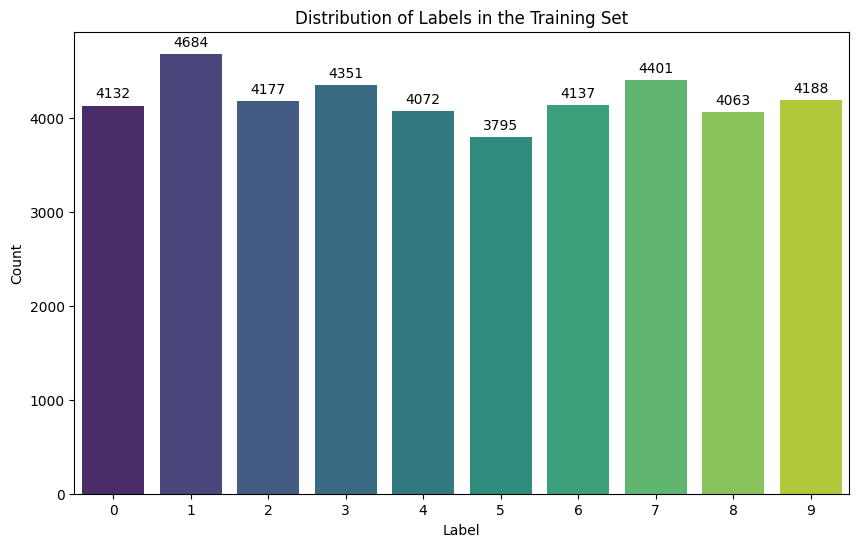

In [8]:
# Count the occurrences of each label
label_counts = train['label'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x=label_counts.index, y=label_counts.values, palette="viridis")
# Add the counts above the bars
for i in range(len(label_counts)):
    barplot.text(i, label_counts.values[i] + 50, label_counts.values[i], ha='center', va='bottom')
    
plt.title('Distribution of Labels in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

28


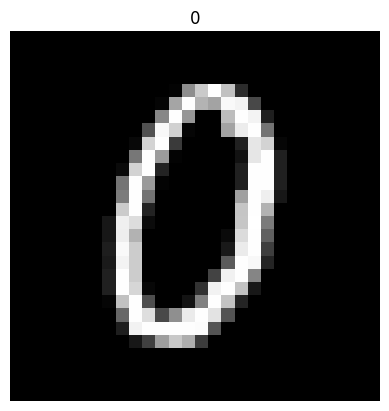

In [9]:
# Take a look at the image
# what is the size of the image? Take a quick math
size = int(math.sqrt(X_train.shape[1]))
print(size)

# Now display some of the digit images
img = X_train.iloc[5].to_numpy().reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[5,0])
plt.axis("off")
plt.show()

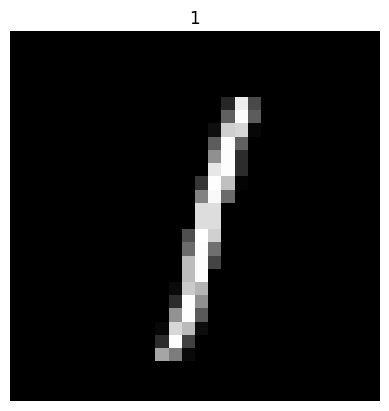

In [10]:
# Second random image
img = X_train.iloc[15].to_numpy().reshape(28,28)
plt.imshow(img,cmap='gray')
plt.title(train.iloc[15,0])
plt.axis("off")
plt.show()

In [11]:
# Get the 16th row (index 15)
row = X_train.iloc[15]

# Convert row to a list and then to a set to get unique values
unique_values = set(row.tolist())

# Print each unique value
print("Unique values in the 16th row:")
for value in unique_values:
    print(value)

Unique values in the 16th row:
0
130
4
7
9
10
13
14
143
144
146
165
38
44
45
181
54
187
188
192
66
68
73
202
78
207
208
214
215
90
92
221
96
97
231
107
236
111
249
124
253
254
255


In [12]:
# How nany digits?
y_train.nunique()

10

In [13]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# CNNs expect input data in a specific format, typically as 4D tensors of shape (number_of_samples, height, width, channels). 
X_train = X_train.values.reshape(-1, 28, 28, 1)
test = test.values.reshape(-1, 28, 28, 1)
print("X_train shape: ", X_train.shape)
print("test shape: ", test.shape)

X_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


**Why encoding?**
you can use to_categorical() from Keras to convert your integer class labels into one-hot encoded vectors. This is particularly useful when you have a classification problem with categorical labels, and your model's output layer expects one-hot encoded vectors. if your class starts with 0 then index 1 is class 0 but if class starts with 1 then idex 1 is just 1. The to_categorical function will one-hot encode the labels starting from the smallest class value.
**If your class is in string format then you should use LabelEncoder**

In [14]:
# Encode the y_train labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)

# Verify the encoding
type(y_train)

numpy.ndarray

In [15]:
# Split the train and the validation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state= 2)

In [16]:
# Initialize the Sequential model
model = Sequential()

# First Convolutional Layer
# Adds a 2D convolution layer with 8 filters, each of size 5x5. 
# 'Same' padding means the output size is the same as the input size.
# ReLU activation function is used.
# The input shape is specified as (28, 28, 1) for the first layer (grayscale image of size 28x28).
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (28,28,1)))

# First Max Pooling Layer
# Adds a max pooling layer with a pool size of 2x2. 
# This reduces the spatial dimensions (height and width) of the feature maps by half.
model.add(MaxPool2D(pool_size=(2,2)))

# First Dropout Layer
# Adds a dropout layer with a dropout rate of 25%. 
# This helps prevent overfitting by randomly setting 25% of the input units to 0 during training.
model.add(Dropout(0.25))

# Second Convolutional Layer
# Adds another 2D convolution layer with 16 filters, each of size 3x3.
# 'Same' padding is used, and the ReLU activation function is applied.
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))

# Second Max Pooling Layer
# Adds another max pooling layer with a pool size of 2x2 and a stride of 2.
# This further reduces the spatial dimensions of the feature maps by half.
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Second Dropout Layer
# Adds another dropout layer with a dropout rate of 25%.
model.add(Dropout(0.25))

# Flatten Layer
# Flattens the input, converting the 2D matrix into a 1D vector.
# This is required before feeding the data into fully connected (dense) layers.
model.add(Flatten())

# First Fully Connected (Dense) Layer
# Adds a dense layer with 256 units and ReLU activation.
# This layer is fully connected, meaning each neuron is connected to every neuron in the previous layer.
model.add(Dense(256, activation = "relu"))

# Third Dropout Layer
# Adds a dropout layer with a dropout rate of 50%.
# This helps prevent overfitting by randomly setting 50% of the input units to 0 during training.
model.add(Dropout(0.5))

# Output Layer
# Adds a dense layer with 10 units (one for each class in the dataset) and softmax activation.
# The softmax activation function outputs a probability distribution over the 10 classes.
model.add(Dense(10, activation = "softmax"))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
# Initialize optimizer
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

In [18]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [19]:
# Create an instance of ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  # Do not set input mean to 0 over the dataset
    samplewise_center=False,   # Do not set each sample mean to 0
    featurewise_std_normalization=False,  # Do not divide inputs by std of the dataset
    samplewise_std_normalization=False,   # Do not divide each input by its std
    zca_whitening=False,  # Do not apply ZCA whitening
    rotation_range=5,     # Randomly rotate images in the range (degrees, 0 to 5)
    zoom_range=0.1,       # Randomly zoom image by 10%
    width_shift_range=0.1,  # Randomly shift images horizontally by 10% of total width
    height_shift_range=0.1, # Randomly shift images vertically by 10% of total height
    horizontal_flip=False,  # Do not randomly flip images horizontally
    vertical_flip=False    # Do not randomly flip images vertically
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

In [20]:
# Suppose you have a dataset of 1000 observations. You have a batch size of 50, 
# you have set to run 10 epochs. In each epoch, you have 20 batches (1000/50 = 20). 
# Each batch gets passed through the algorithm, therefore you have 20 iterations per epoch.
# Define batch size and steps per epoch
epochs = 10
batch_size = 250
steps_per_epoch = X_train.shape[0] // batch_size


# **Warning**
**You may take a look at the below code for warning message "Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset." I ask Chatgpt for possible cause like incorrect steps_per_epoch but I dont think it is the reason for my code here and if someone can help me figure it out then I really appreciate! :)**

In [21]:
# # Create a generator function
# def generator():
#     for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=batch_size):
#         yield X_batch, y_batch

# # Define the batch size and epochs
# batch_size = 250
# epochs = 10

# # Create a TensorFlow dataset from the generator
# dataset = tf.data.Dataset.from_generator(generator,
#                                          output_signature=(
#                                              tf.TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32), # Image batch with dynamic batch size
#                                              tf.TensorSpec(shape=(None,), dtype=tf.int32) # Label batch with dynamic batch size
#                                          ))

# # Apply batching and repeating
# dataset = dataset.repeat().batch(batch_size)

# # Calculate the number of steps per epoch
# steps_per_epoch = (len(X_train) + batch_size - 1) // batch_size

**Uncomment the first CNN code if you wanna use above code snippet**

In [22]:
# Train the model

# CNN = model.fit(dataset, epochs=epochs, validation_data=(X_val, y_val), steps_per_epoch=steps_per_epoch)


CNN = model.fit(datagen.flow(X_train, y_train, batch_size = batch_size), epochs = epochs, validation_data = (X_val, y_val), 
               steps_per_epoch = steps_per_epoch)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


151/151 ━━━━━━━━━━━━━━━━━━━━ 19s 108ms/step - accuracy: 0.4693 - loss: 1.5466 - val_accuracy: 0.9493 - val_loss: 0.2144
Epoch 2/10
  1/151 ━━━━━━━━━━━━━━━━━━━━ 11s 78ms/step - accuracy: 0.8360 - loss: 0.4863

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8360 - loss: 0.4863 - val_accuracy: 0.9493 - val_loss: 0.2117
Epoch 3/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 104ms/step - accuracy: 0.8487 - loss: 0.4759 - val_accuracy: 0.9619 - val_loss: 0.1280
Epoch 4/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8800 - loss: 0.3375 - val_accuracy: 0.9633 - val_loss: 0.1282
Epoch 5/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 105ms/step - accuracy: 0.9000 - loss: 0.3224 - val_accuracy: 0.9710 - val_loss: 0.1001
Epoch 6/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9120 - loss: 0.2663 - val_accuracy: 0.9710 - val_loss: 0.1000
Epoch 7/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 16s 103ms/step - accuracy: 0.9169 - loss: 0.2644 - val_accuracy: 0.9743 - val_loss: 0.0858
Epoch 8/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9280 - loss: 0.2070 - val_accuracy: 0.9752 - val_loss: 0.0857
Epoch 9/10
151/151 ━━━━━━━━━━━━━━━━━━━━ 17s 107ms/step - accuracy: 0.9304 - loss: 0.2285 - val_accuracy: 0

132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


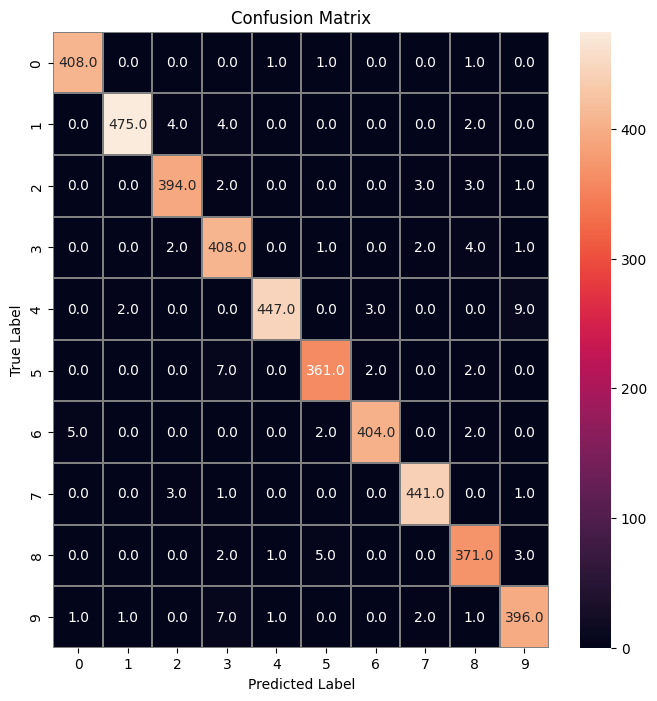

In [23]:
# confusion matrix

# Predict the values from the validation dataset
y_pred = model.predict(X_val)

# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred,axis = 1) 

# Convert validation observations to one hot vectors
y_true = np.argmax(y_val,axis = 1) 

# compute the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes) 

# plot the confusion matrix
figure,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# **Reference:**<br>
This notebook is based on https://www.kaggle.com/code/kanncaa1/convolutional-neural-network-cnn-tutorial. <br>
I did some modification:
1. as_matrix() is already deprecated. Check here https://pandas.pydata.org/pandas-docs/version/0.25.1/reference/api/pandas.DataFrame.as_matrix.html 
2. Add some useful comments for why to use to_categorical() and when to use LabelEncoder
3. Some possible solution for the [warning](#Warning)